In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from sklearn.metrics import r2_score

from prophet import Prophet

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 12)

In [3]:
warnings.filterwarnings("ignore")

# Data Preparation

In [4]:
weather_df = pd.read_csv('NASA_weather_latitude_51.5_longitude_37.0.csv', skiprows=8)
weather_df["DATE"] = pd.to_datetime(weather_df["DAY"], format='%Y%m%d')
# weather_df.set_index('DAY', inplace=True)

In [5]:
weather_df.head()

,DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH,DATE
0,19840101,2500.0,-5.20,0.26,0.479845,7.59,2.93,NaN,1984-01-01
1,19840102,3250.0,0.30,1.26,0.610800,7.50,2.77,NaN,1984-01-02
2,19840103,4240.0,-1.74,0.99,0.534874,7.11,0.72,NaN,1984-01-03
3,19840104,2740.0,-1.13,0.66,0.592380,5.12,0.44,NaN,1984-01-04
4,19840105,1890.0,-3.70,0.99,0.569003,3.09,0.88,NaN,1984-01-05


**train-test split**

In [6]:
train_tmp = weather_df[weather_df.DATE.dt.year > 1999].copy()
train_data = train_tmp[train_tmp.DATE.dt.year < 2015].copy()

In [7]:
test_tmp = weather_df[weather_df.DATE.dt.year > 2014].copy()
test_data = test_tmp[test_tmp.DATE.dt.year < 2020].copy()

In [8]:
def plotter(train, test, col):
    plt.title(f"{col} train-test plot")
    train[f'{col}'].plot(style='b')
    test[f'{col}'].plot(style='r')
    plt.legend(['train', 'test'], loc=1, prop={'size': 20})
    plt.grid()

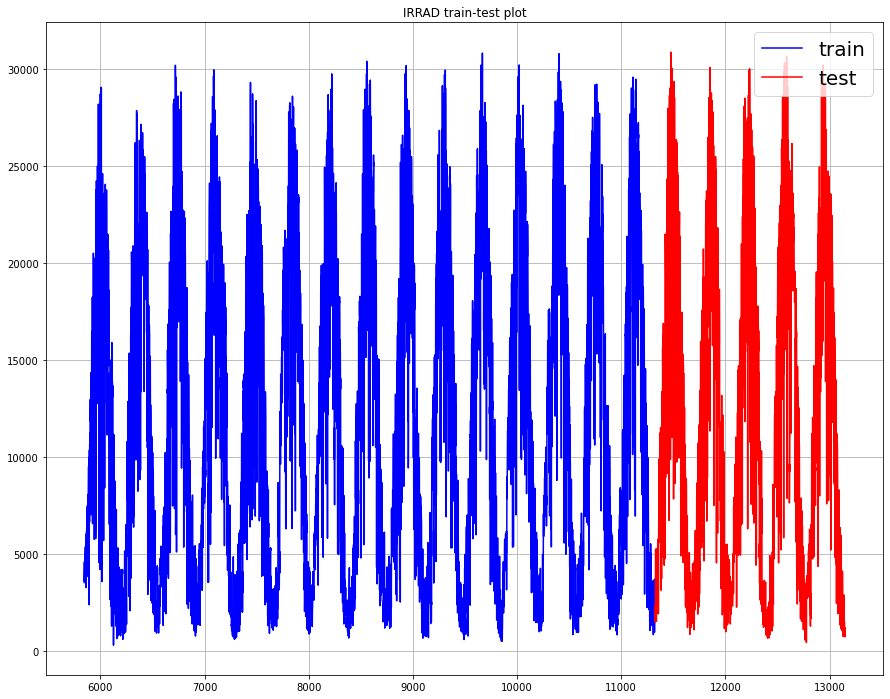

In [9]:
plotter(train_data, test_data, 'IRRAD')

# PROPHET

## IRRAD

In [10]:
irrad_train = train_data[['DATE', 'IRRAD']].copy()
irrad_train.rename(columns={"DATE": "ds", "IRRAD": "y"}, inplace=True)

In [11]:
irrad_model = Prophet('flat')
irrad_model.fit(irrad_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -198.376


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      10       8462.04   0.000622481      0.807585       0.998       0.998       15   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [12]:
future = irrad_model.make_future_dataframe(periods=test_data.shape[0])
irrad_forecast = irrad_model.predict(future)

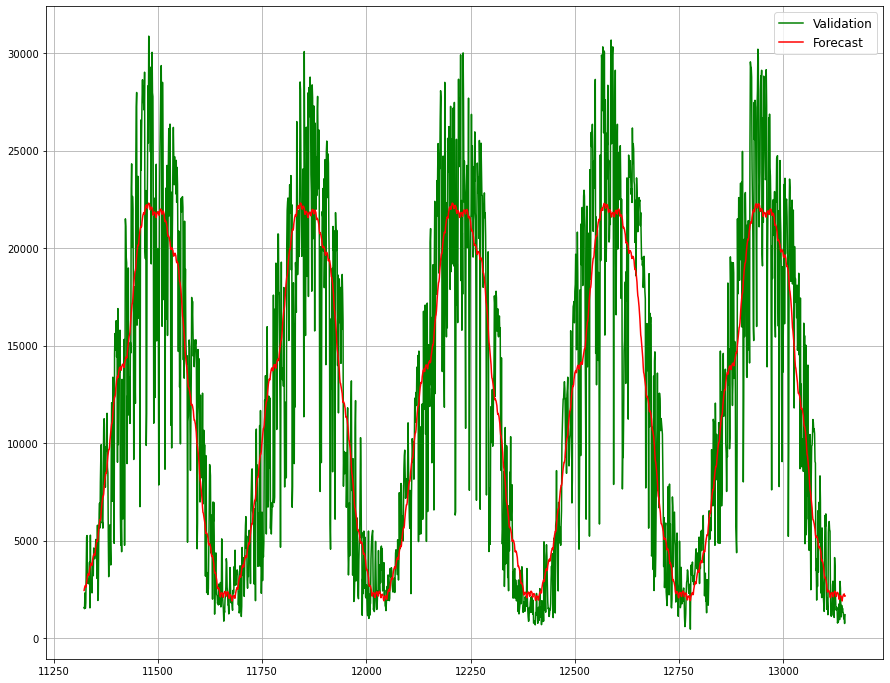

In [13]:
test_data['IRRAD_hat'] = irrad_forecast[-test_data.shape[0]:].yhat.to_numpy()
test_data.IRRAD.plot(style=['g']);
test_data.IRRAD_hat.plot(style=['r']);
plt.legend(['Validation', 'Forecast'], loc=1, prop={'size': 12});
plt.grid();

In [14]:
print(f'R2 Score:\t{r2_score(test_data.IRRAD, test_data.IRRAD_hat)}')

R2 Score:	0.7695037163980784


## TMIN

In [15]:
tmin_train = train_data[['DATE', 'TMIN']].copy()
tmin_train.rename(columns={"DATE": "ds", "TMIN": "y"}, inplace=True)

In [16]:
tmin_model = Prophet()
tmin_model.fit(tmin_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -937.018
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8430.38   0.000323569       81.2179       0.633      0.0633      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       8430.94    0.00195467       132.132   2.243e-05       0.001      222  LS failed, Hessian reset 
     199        8431.1   2.06593e-05       93.4277      0.5764      0.5764      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8431.19     0.0024562       77.4742           1           1      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        8431.5    0.00447334       97.1714           1           1      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     407       8431.55   0.000198887    

In [17]:
tmin_forecast = tmin_model.predict(future)

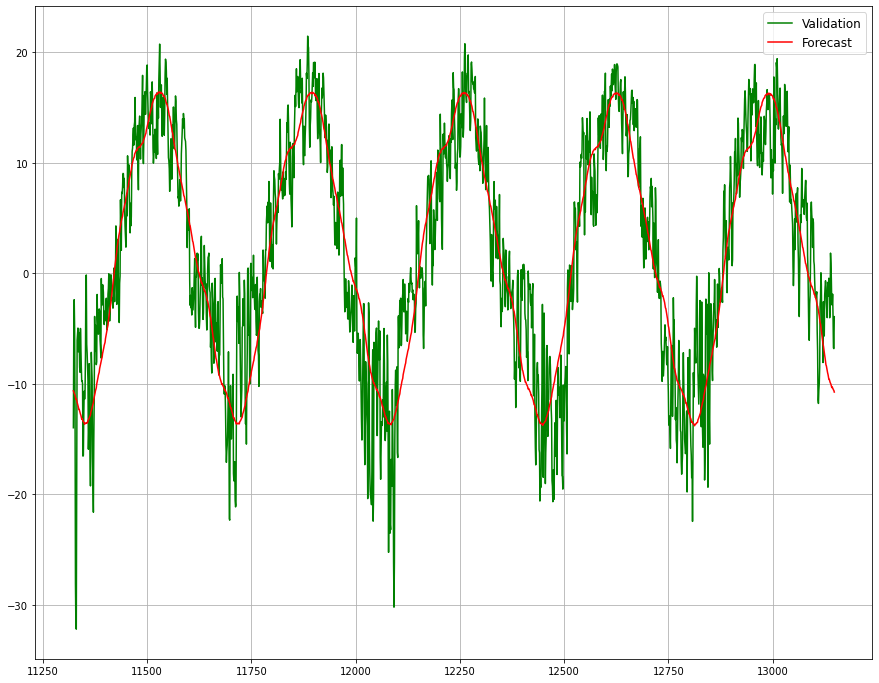

In [18]:
test_data['TMIN_hat'] = tmin_forecast[-test_data.shape[0]:].yhat.to_numpy()
test_data.TMIN.plot(style=['g']);
test_data.TMIN_hat.plot(style=['r']);
plt.legend(['Validation', 'Forecast'], loc=1, prop={'size': 12});
plt.grid();

In [19]:
print(f'R2 Score:\t{r2_score(test_data.TMIN, test_data.TMIN_hat)}')

R2 Score:	0.8125110127128536


## TMAX

In [20]:
tmax_train = train_data[['DATE', 'TMAX']].copy()
tmax_train.rename(columns={"DATE": "ds", "TMAX": "y"}, inplace=True)

In [21]:
tmax_model = Prophet('flat')
tmax_model.fit(tmax_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -282.847


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       9       9143.15   5.49946e-05      0.564243           1           1       15   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [22]:
tmax_forecast = tmax_model.predict(future)

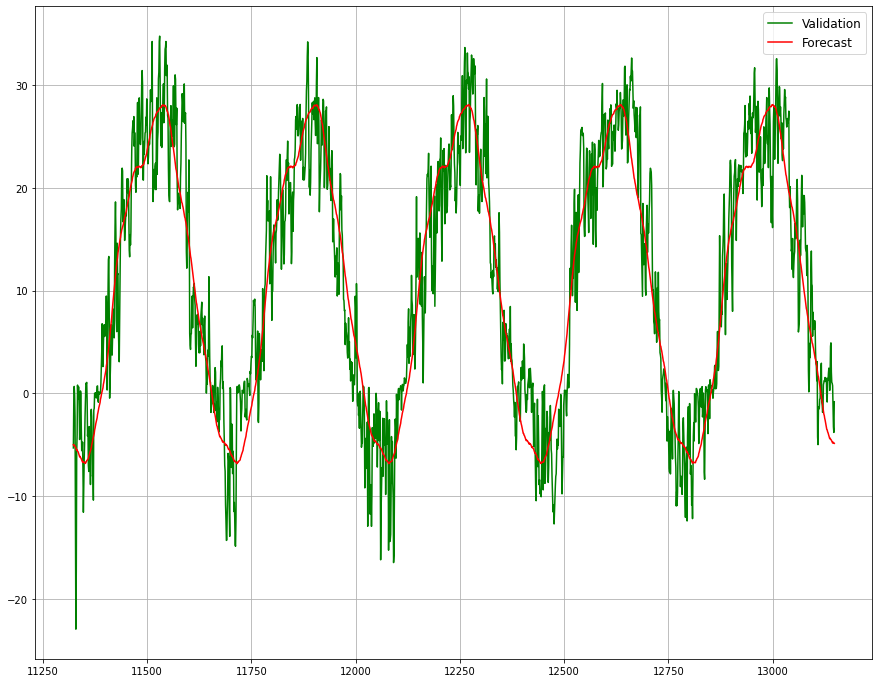

In [23]:
test_data['TMAX_hat'] = tmax_forecast[-test_data.shape[0]:].yhat.to_numpy()
test_data.TMAX.plot(style=['g']);
test_data.TMAX_hat.plot(style=['r']);
plt.legend(['Validation', 'Forecast'], loc=1, prop={'size': 12});
plt.grid();

In [24]:
print(f'R2 Score:\t{r2_score(test_data.TMAX, test_data.TMAX_hat)}')

R2 Score:	0.8736747178896309


## VAP

In [25]:
vap_train = train_data[['DATE', 'VAP']].copy()
vap_train.rename(columns={"DATE": "ds", "VAP": "y"}, inplace=True)

In [26]:
vap_model = Prophet('flat')
vap_model.fit(vap_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -121.908


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      14       10248.7   3.56389e-05      0.994538      0.6483      0.6483       20   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [27]:
vap_forecast = vap_model.predict(future)

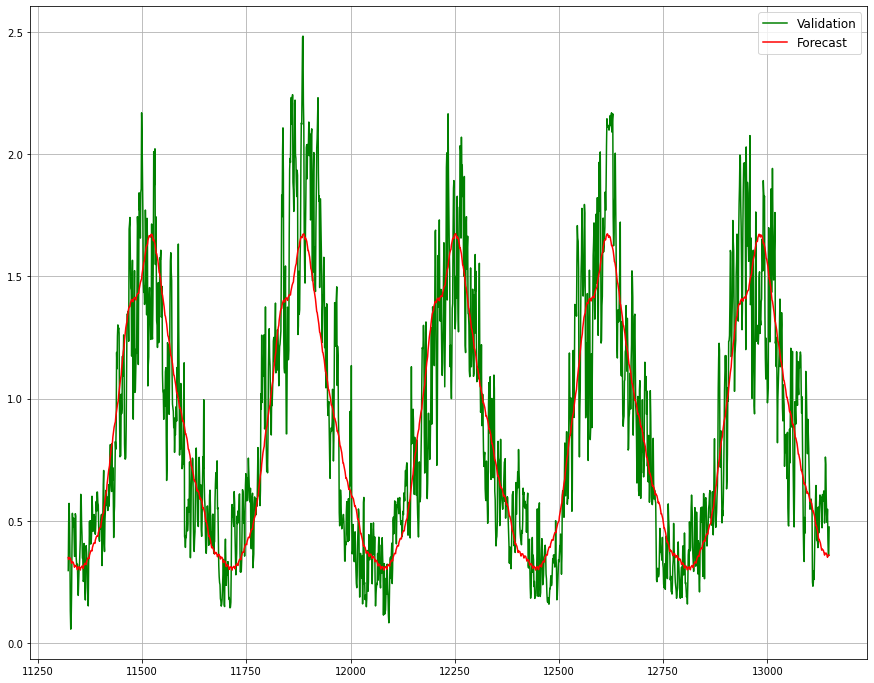

In [28]:
test_data['VAP_hat'] = vap_forecast[-test_data.shape[0]:].yhat.to_numpy()
test_data.VAP.plot(style=['g']);
test_data.VAP_hat.plot(style=['r']);
plt.legend(['Validation', 'Forecast'], loc=1, prop={'size': 12});
plt.grid();

In [29]:
print(f'R2 Score:\t{r2_score(test_data.VAP, test_data.VAP_hat)}')

R2 Score:	0.783076444139881


## WIND

In [30]:
wind_train = train_data[['DATE', 'WIND']].copy()
wind_train.rename(columns={"DATE": "ds", "WIND": "y"}, inplace=True)

In [31]:
wind_model = Prophet('flat')
wind_model.fit(wind_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -47.2145


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       7       9025.51   8.22616e-05      0.544798           1           1       15   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [32]:
wind_forecast = wind_model.predict(future)

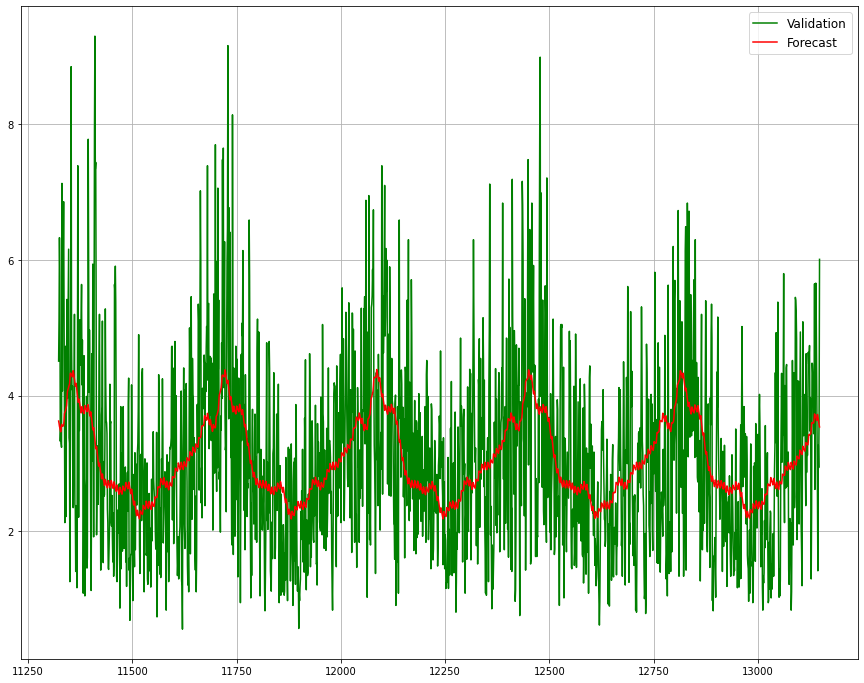

In [33]:
test_data['WIND_hat'] = wind_forecast[-test_data.shape[0]:].yhat.to_numpy()
test_data.WIND.plot(style=['g']);
test_data.WIND_hat.plot(style=['r']);
plt.legend(['Validation', 'Forecast'], loc=1, prop={'size': 12});
plt.grid();

In [34]:
print(f'R2 Score:\t{r2_score(test_data.WIND, test_data.WIND_hat)}')

R2 Score:	0.16714230380647965


## RAIN

In [35]:
rain_train = train_data[['DATE', 'RAIN']].copy()
rain_train.rename(columns={"DATE": "ds", "RAIN": "y"}, inplace=True)

In [36]:
rain_model = Prophet('flat')
rain_model.fit(rain_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -28.2239


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       7       10031.1    1.6072e-05      0.718479      0.3975      0.9719       13   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [37]:
rain_forecast = rain_model.predict(future)

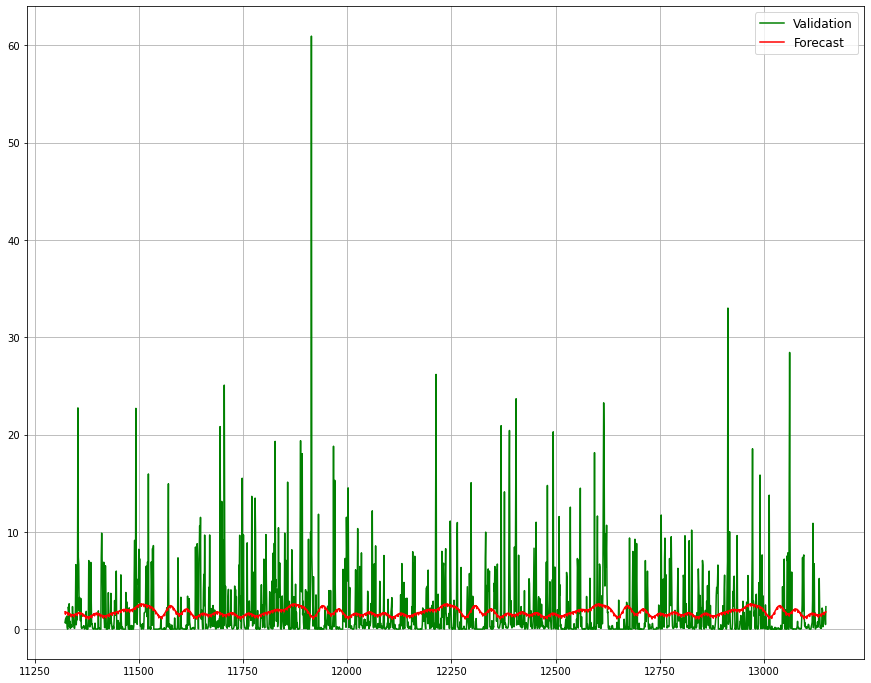

In [38]:
test_data['RAIN_hat'] = rain_forecast[-test_data.shape[0]:].yhat.to_numpy()
test_data.RAIN.plot(style=['g']);
test_data.RAIN_hat.plot(style=['r']);
plt.legend(['Validation', 'Forecast'], loc=1, prop={'size': 12});
plt.grid();

In [39]:
print(f'R2 Score:\t{r2_score(test_data.RAIN, test_data.RAIN_hat)}')

R2 Score:	-0.007759663122932192


# AVARAGE

In [40]:
avarage = train_data.groupby(by=[train_data.DATE.dt.month, train_data.DATE.dt.day]).mean()

IRRAD_year = avarage[avarage.index != (2, 29)].IRRAD.to_numpy()
IRRAD_leap_year = avarage.IRRAD.to_numpy()

TMIN_year = avarage[avarage.index != (2, 29)].TMIN.to_numpy()
TMIN_leap_year = avarage.TMIN.to_numpy()

TMAX_year = avarage[avarage.index != (2, 29)].TMAX.to_numpy()
TMAX_leap_year = avarage.TMAX.to_numpy()

VAP_year = avarage[avarage.index != (2, 29)].VAP.to_numpy()
VAP_leap_year = avarage.VAP.to_numpy()

WIND_year = avarage[avarage.index != (2, 29)].WIND.to_numpy()
WIND_leap_year = avarage.WIND.to_numpy()

RAIN_year = avarage[avarage.index != (2, 29)].RAIN.to_numpy()
RAIN_leap_year = avarage.RAIN.to_numpy()

In [41]:
test_data['IRRAD_avg'] = np.concatenate((IRRAD_year, IRRAD_leap_year, IRRAD_year, IRRAD_year, IRRAD_year), axis=0)
test_data['TMIN_avg'] = np.concatenate((TMIN_year, TMIN_leap_year, TMIN_year, TMIN_year, TMIN_year), axis=0)
test_data['TMAX_avg'] = np.concatenate((TMAX_year, TMAX_leap_year, TMAX_year, TMAX_year, TMAX_year), axis=0)
test_data['VAP_avg'] = np.concatenate((VAP_year, VAP_leap_year, VAP_year, VAP_year, VAP_year), axis=0)
test_data['WIND_avg'] = np.concatenate((WIND_year, WIND_leap_year, WIND_year, WIND_year, WIND_year), axis=0)
test_data['RAIN_avg'] = np.concatenate((RAIN_year, RAIN_leap_year, RAIN_year, RAIN_year, RAIN_year), axis=0)

# COMPARE

In [42]:
print("\033[1m" + "Prophet" + "\033[1m")
print(f'R2 Score IRRAD:\t{r2_score(test_data.IRRAD, test_data.IRRAD_hat)}')
print(f'R2 Score TMIN:\t{r2_score(test_data.TMIN, test_data.TMIN_hat)}')
print(f'R2 Score TMAX:\t{r2_score(test_data.TMAX, test_data.TMAX_hat)}')
print(f'R2 Score VAP:\t{r2_score(test_data.VAP, test_data.VAP_hat)}')
print(f'R2 Score WIND:\t{r2_score(test_data.WIND, test_data.WIND_hat)}')
print(f'R2 Score RAIN:\t{r2_score(test_data.RAIN, test_data.RAIN_hat)}')

Prophet
R2 Score IRRAD:	0.7695037163980784
R2 Score TMIN:	0.8125110127128536
R2 Score TMAX:	0.8736747178896309
R2 Score VAP:	0.783076444139881
R2 Score WIND:	0.16714230380647965
R2 Score RAIN:	-0.007759663122932192


In [43]:
print("\033[1m" + "Avarage" + "\033[1m")
print(f'R2 Score IRRAD:\t{r2_score(test_data.IRRAD, test_data.IRRAD_avg)}')
print(f'R2 Score TMIN:\t{r2_score(test_data.TMIN, test_data.TMIN_avg)}')
print(f'R2 Score TMAX:\t{r2_score(test_data.TMAX, test_data.TMAX_avg)}')
print(f'R2 Score VAP:\t{r2_score(test_data.VAP, test_data.VAP_avg)}')
print(f'R2 Score WIND:\t{r2_score(test_data.WIND, test_data.WIND_avg)}')
print(f'R2 Score RAIN:\t{r2_score(test_data.RAIN, test_data.RAIN_avg)}')

Avarage
R2 Score IRRAD:	0.7609142326849094
R2 Score TMIN:	0.8061203739969385
R2 Score TMAX:	0.8712290229405724
R2 Score VAP:	0.7784953518632737
R2 Score WIND:	0.0985660352955875
R2 Score RAIN:	-0.05690642353976405


In [44]:
test_data.head()

,DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH,DATE,IRRAD_hat,...,TMAX_hat,VAP_hat,WIND_hat,RAIN_hat,IRRAD_avg,TMIN_avg,TMAX_avg,VAP_avg,WIND_avg,RAIN_avg
11323,20150101,1570.0,-13.97,-5.31,0.296775,4.51,0.68,NaN,2015-01-01,2444.759620,...,-4.995574,0.349984,3.627238,1.783456,2659.333333,-10.528000,-5.593333,0.338065,3.100000,0.913333
11324,20150102,1510.0,-5.18,-0.77,0.492191,5.11,0.96,NaN,2015-01-02,2575.333388,...,-5.091093,0.342068,3.593381,1.533375,2694.000000,-10.911333,-5.608000,0.334922,3.724667,2.240667
11325,20150103,2320.0,-2.38,0.68,0.571513,6.33,1.14,NaN,2015-01-03,2625.551686,...,-5.019448,0.349538,3.550257,1.762349,2864.666667,-12.404000,-5.602000,0.317909,3.388000,1.838667
11326,20150104,1530.0,-4.93,-0.16,0.506322,5.75,0.59,NaN,2015-01-04,2699.011603,...,-5.111563,0.348583,3.520703,1.730274,2709.333333,-12.902667,-6.960667,0.315938,2.994667,1.356667
11327,20150105,1800.0,-11.96,-2.27,0.369812,3.33,1.33,NaN,2015-01-05,2611.028557,...,-5.121399,0.348555,3.496088,1.713361,2960.666667,-14.481333,-7.332667,0.300257,2.942667,1.124000


In [45]:
weather = test_data[['DAY', 'IRRAD', 'TMIN', 'TMAX', 'VAP', 'WIND', 'RAIN', 'SNOWDEPTH']].copy()
weather.to_csv('weather2015-2020.csv',index=False)

In [46]:
weather_part_forecast = test_data[['DAY', 'IRRAD_hat', 'TMIN_hat', 'TMAX_hat', 'VAP_hat', 'WIND', 'RAIN', 'SNOWDEPTH']].copy()
weather_part_forecast.rename(columns={
    "IRRAD_hat": "IRRAD", 
    "TMIN_hat": "TMIN", 
    "TMAX_hat": "TMAX", 
    "VAP_hat": "VAP",
}, inplace=True)
weather_part_forecast.to_csv('weather_partforecast_2015-2020.csv',index=False)

In [47]:
weather_forecast = test_data[['DAY', 'IRRAD_hat', 'TMIN_hat', 'TMAX_hat', 'VAP_hat', 'WIND_hat', 'RAIN_hat', 'SNOWDEPTH']].copy()
weather_forecast.rename(columns={
    "IRRAD_hat": "IRRAD", 
    "TMIN_hat": "TMIN", 
    "TMAX_hat": "TMAX", 
    "VAP_hat": "VAP",
    "WIND_hat": "WIND",
    "RAIN_hat": "RAIN"
}, inplace=True)
weather_forecast.to_csv('weather_forecast_2015-2020.csv',index=False)

In [48]:
weather_forecast

,DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH
11323,20150101,2444.759620,-10.635813,-4.995574,0.349984,3.627238,1.783456,NaN
11324,20150102,2575.333388,-10.739816,-5.091093,0.342068,3.593381,1.533375,NaN
11325,20150103,2625.551686,-10.854426,-5.019448,0.349538,3.550257,1.762349,NaN
11326,20150104,2699.011603,-10.948030,-5.111563,0.348583,3.520703,1.730274,NaN
11327,20150105,2611.028557,-11.031238,-5.121399,0.348555,3.496088,1.713361,NaN
...,...,...,...,...,...,...,...,...
13144,20191227,2224.674567,-10.373795,-4.822367,0.351007,3.691551,1.477409,NaN
13145,20191228,2232.791234,-10.470719,-4.741759,0.359214,3.647182,1.731194,NaN
13146,20191229,2268.266841,-10.541288,-4.819748,0.359048,3.612672,1.724827,NaN
13147,20191230,2147.075324,-10.597100,-4.811022,0.359826,3.579380,1.733766,NaN


## Convert weather forecast into Crop model format data



In [49]:
import numpy as np
import os, sys
import datetime as dt
import pandas as pd

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
import json

from tqdm import tqdm_notebook as tqdm

import traceback
import yaml
from dateutil.relativedelta import relativedelta
from dateutil.parser import pars


ImportError: cannot import name 'pars' from 'dateutil.parser' (/Users/mikhailgasanov/opt/anaconda3/envs/geopandas/lib/python3.8/site-packages/dateutil/parser/__init__.py)

In [50]:

import math
from ast import literal_eval

from pcse.base import WeatherDataContainer, WeatherDataProvider
from pcse.util import reference_ET, angstrom, check_angstromAB
from pcse.exceptions import PCSEError
from pcse.settings import settings


class ParseError(PCSEError):
    pass

class OutOfRange(PCSEError):
    pass


class IRRADFromSunshineDuration:

    def __init__(self, latitude, angstA, angstB):

        assert -90 < latitude < 90, \
            "Invalid latitude value (%s) encountered" % latitude
        check_angstromAB(angstA, angstB)
        self.latitude = latitude
        self.angstA = angstA
        self.angstB = angstB

    def __call__(self, value, day):
        """Computes irradiance in J/m2/day from sunshine duration by applying the Angstrom equation

        :param value: sunshine duration in hours
        :param day: the day
        :return: irradiance in J/m2/day
        """
        assert 0 <= value <= 24, \
            "Invalid sunshine duration value (%s) encountered at day %s" % (value, day)
        irrad = angstrom(day, self.latitude, value, self.angstA, self.angstB)

        return irrad


def csvdate_to_date(x, dateformat):
    """Converts string x to a datetime.date using given format.

    :param x: the string representing a date
    :param dateformat: a strptime() accepted date format
    :return: a date
    """
    return dt.datetime.strptime(x, dateformat).date()


# Conversion functions
def NoConversion(x, d):
    return float(x)


def kJ_to_J(x, d):
    return float(x)*1000.


def mm_to_cm(x, d):
    return float(x)/10.


def kPa_to_hPa(x, d):
    return float(x)*10.


class ForecastConverter(WeatherDataProvider):
    """Reading weather data from pandas.DataFrame into PCSE Weather Container.
    :df pandas.DataFrame with weather records
    :param dateformat: date format to be read. Default is '%Y%m%d'
    :keyword ETmodel: "PM"|"P" for selecting Penman-Monteith or Penman
        method for reference evapotranspiration. Default is 'PM'.
    :metainfo dict with general info 
        ## Site Characteristics
        Country     = 'Netherlands'
        Station     = 'Wageningen, Haarweg'
        Description = 'Observed data from Station Haarweg in Wageningen'
        Source      = 'Meteorology and Air Quality Group, Wageningen University'
        Contact     = 'Peter Uithol'
        Longitude = 5.67; Latitude = 51.97; Elevation = 7; AngstromA = 0.18; AngstromB = 0.55; HasSunshine = False
        ## Daily weather observations (missing values are NaN)
        DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH
    """

    obs_conversions = {
        "TMAX": NoConversion,
        "TMIN": NoConversion,
        "IRRAD": kJ_to_J,
        "VAP": kPa_to_hPa,
        "WIND": NoConversion,
        "RAIN": mm_to_cm,
        "SNOWDEPTH": NoConversion
    }

    def __init__(self, metainfo:dict,
                 df: pd.DataFrame,
                 dateformat:str='%Y-%m-%d',
                 ETmodel:str='PM', 
                 force_reload:bool=False):
        
        WeatherDataProvider.__init__(self)
        self.dateformat = dateformat
        self.ETmodel = ETmodel
        
        self._read_meta(metainfo)
        
        self._read_observations(df)

    def _read_meta(self, metainfo):
        header = metainfo

        self.nodata_value = -99
        self.description = [u"Weather data for:",
                            u"Country: %s" % header['Country'],
                            u"Station: %s" % header['Station'],
                            u"Description: %s" % header['Description'],
                            u"Source: %s" % header['Source'],
                            u"Contact: %s" % header['Contact']]

        self.longitude = float(header['Longitude'])
        self.latitude = float(header['Latitude'])
        self.elevation = float(header['Elevation'])
        angstA = float(header['AngstromA'])
        angstB = float(header['AngstromB'])
        self.angstA, self.angstB = check_angstromAB(angstA, angstB)
        self.has_sunshine = bool(header['HasSunshine'])
        # If the file has sunshine duration, we replace the convertor with the angstrom module
        if self.has_sunshine:
            self.obs_conversions["IRRAD"] = IRRADFromSunshineDuration(self.latitude, self.angstA, self.angstB)

    def _read_observations(self, df: pd.DataFrame):
        """Processes the pandas DataFrame with meteo data
           and converts into the correct units.
        """
        for i, d in df.iterrows():
            try:
                day = None
                day = csvdate_to_date(d.pop("DAY"), self.dateformat)
                row = {"DAY":  day}
                for label in self.obs_conversions.keys():
                    func = self.obs_conversions[label]
                    value = float(d[label])
                    r = func(value, day)
                    if math.isnan(r):
                        if label == "SNOWDEPTH":
                            continue
                        raise ParseError
                    row[label] = r
                # Reference ET in mm/day
                e0, es0, et0 = reference_ET(LAT=self.latitude, ELEV=self.elevation,
                                            ANGSTA=self.angstA, ANGSTB=self.angstB,
                                            ETMODEL=self.ETmodel, **row)
                # convert to cm/day
                row["E0"] = e0/10.
                row["ES0"] = es0/10.
                row["ET0"] = et0/10.

                wdc = WeatherDataContainer(LAT=self.latitude, 
                                           LON=self.longitude,
                                           ELEV=self.elevation, **row)
                self._store_WeatherDataContainer(wdc, day)
            except (ParseError, KeyError):
                msg = "Failed reading element '%s' for day '%s' at line %i. Skipping ..." % (label, day, i)
                self.logger.warn(msg)
            except ValueError as e:  # strange value in cell
                msg = "Failed computing a value for day '%s' at row %i" % (day, i)
                self.logger.warn(msg)



In [51]:

lat = 51.43
lon =  37.25

elevation = 150

AngstromA = 0.18
AngstromB = 0.55

metainfo = {"Country": "Russia",
           "Station" : "Kshen",
           "Description": "Forecast for Kshen, Kursk",
           "Source": "MSU",
           "Contact": "grol81@mail.ru",
           "Longitude": lon,
           "Latitude": lat,
           "Elevation": elevation,
           "AngstromA":AngstromA,
           "AngstromB":AngstromB,
           "HasSunshine": False}

# Convert int format of DAY into str
weather_forecast.loc[:, 'DAY'] = weather_forecast.loc[:, 'DAY'].astype(str)

weather_crop_model = ForecastConverter(metainfo=metainfo, df = weather_forecast, dateformat="%Y%m%d")

## Prepare simulation scenario, soil and other input data

### Crop parameters

In [52]:
from pcse.util import WOFOST71SiteDataProvider
from pcse.fileinput import YAMLCropDataProvider

import pcse
from pcse.models import Wofost71_WLP_FD
from pcse.fileinput import CABOFileReader, YAMLCropDataProvider
from pcse.db import NASAPowerWeatherDataProvider
from pcse.util import WOFOST71SiteDataProvider, DummySoilDataProvider
from pcse.base import ParameterProvider


In [53]:
cropd = YAMLCropDataProvider()
cropd.set_active_crop(crop_name='sugarbeet',
                      variety_name='Sugarbeet_603')

### Soil parameters

In [54]:
soil_kshen =  [{
    "Thickness": [0.3, "m"],
    "SoilOrganicCarbon": [5.1, "%"],
    "KA5TextureClass": "Lu",
    "Sand":[0.037, "kg kg-1 (%[0-1])"],
    "Clay":[0.09, "kg kg-1 (%[0-1])"],
    "Skeleton":[0.02, "%[0-1]"],
    "PoreVolume":[0.566, "m3 m-3"],
    "FieldCapacity":[0.3, "m3 m-3"],
    "PermanentWiltingPoint":[0.15, "m3 m-3"],
    "pH":[6.213],
    "CN":[12.481],
    "SoilBulkDensity":[1126.625, "kg m-3"]
    }, 
    {
    "Thickness": [0.1, "m"],
    "SoilOrganicCarbon": [3.3, "%"],
    "KA5TextureClass": "Lu",
    "Sand":[0.045, "kg kg-1 (%[0-1])"],
    "Clay":[0.088, "kg kg-1 (%[0-1])"],
    "Skeleton":[0.02, "%[0-1]"],
    "PoreVolume":[0.594, "m3 m-3"],
    "FieldCapacity":[0.3, "m3 m-3"],
    "PermanentWiltingPoint":[0.15, "m3 m-3"],
    "pH":[6.397],
    "CN":[10.531],
    "SoilBulkDensity":[1056.667, "kg m-3"]}]

In [55]:
sys.path.append('./soil')
from ANN_Module import PTF_MODEL
from DB_Module import DB

def rosseta(data_in, n_model=3):
    with DB(host='localhost', 
            user='root',
            db_name='Rosetta',
            sqlite_path='./soil/sqlite/Rosetta.sqlite') as db:
        ptf_model=PTF_MODEL(n_model, db)
        data=data_in
        raw=False
        if not raw:
            res_dict = ptf_model.predict(data,sum_data=True) 
            vgm_name=res_dict['var_names']
            vgm_mean=res_dict['sum_res_mean']
            vgm_new=np.stack((vgm_mean[0],vgm_mean[1],10**vgm_mean[2],10**vgm_mean[3],10**vgm_mean[4]))
            vgm_new=vgm_new.transpose()
            return vgm_new
        else:
            res_dict = ptf_model.predict(data,sum_data=False)  
            return res_dict

def vangen_direct(theta_r, theta_s, alpha, n, psy: int):
    return theta_r + (theta_s - theta_r) \
            / ((1 + (alpha * psy) ** n)) ** (1 - 1 / n)



In [56]:
# Here we consider only first soil layer (30 cm)

SOC = soil_kshen[0]['SoilOrganicCarbon']
Sand = soil_kshen[0]['Sand'][0] * 100
Clay = soil_kshen[0]['Clay'][0] * 100
Silt = 100 - (Sand + Clay)
BulkDensity = soil_kshen[0]['SoilBulkDensity'][0] / 1000.


# Rosseta function compute soil physics parameters for moddeling based

soil_PFT = rosseta(np.array([[Sand, Silt, Clay, BulkDensity]]).T)

col_names = ['theta_r', 
             'theta_s', 
             'alpha',
             'n',
             'Ks']

soil_df = pd.DataFrame(data=soil_PFT, columns=col_names)

# Compute fieldcapacity
soil_df['Field Capacity'] = vangen_direct(
    theta_r = soil_df['theta_r'],
    theta_s = soil_df['theta_s'],
    alpha = soil_df['alpha'],
    n = soil_df['n'],
    psy = 330
)
# Compute wilting point
soil_df['Wilting point'] = vangen_direct(
    theta_r = soil_df['theta_r'],
    theta_s = soil_df['theta_s'],
    alpha = soil_df['alpha'],
    n = soil_df['n'],
    psy = 15_000
)
# df['Ks'] /= 24.

soil_df.rename(columns={'alpha':'Wmin',
                   'theta_s':'Wmax'}, inplace=True)

In [57]:
soil_df

,theta_r,Wmax,Wmin,n,Ks,Field Capacity,Wilting point
0,0.076877,0.485127,0.002986,1.642017,86.31122,0.389682,0.112401


In [58]:
soild = DummySoilDataProvider()
soild['SM0']=0.8
soild['SMW'] = soil_df['Wilting point'][0]
soild['SMFCF'] = soil_df['Field Capacity'][0]
soild['K0'] = soil_df['Ks'][0]

### Site parameters

In [59]:
sited = WOFOST71SiteDataProvider(WAV=10, CO2=360)


### Crop scenario - Agromanagement

* 2015 - Winter wheat
* 2017 - Sugar-beet

In [60]:
yaml_agro_sugar_beat = f"""
- 2017-04-20:
    CropCalendar:
        crop_name: sugarbeet
        variety_name: Sugarbeet_603
        crop_start_date: 2017-05-20
        crop_start_type: emergence
        crop_end_date: 2017-09-15
        crop_end_type: harvest
        max_duration: 300
    TimedEvents: null
    StateEvents: null
"""


yaml_agro_winter_wheat = f"""
- 2015-08-25:
    CropCalendar:
        crop_name: wheat
        variety_name: Winter_wheat_101
        crop_start_date: 2015-09-25
        crop_start_type: emergence
        crop_end_date: 2016-07-04
        crop_end_type: harvest
        max_duration: 300
    TimedEvents: null
    StateEvents: null
"""


agromanagement = yaml.load(yaml_agro_winter_wheat)


In [61]:


firstkey = list(agromanagement[0])[0]
cropcalendar = agromanagement[0][firstkey]['CropCalendar'] 

cropd.set_active_crop(cropcalendar['crop_name'], cropcalendar['variety_name'])

params = ParameterProvider(cropdata=cropd, sitedata=sited, soildata=soild)


In [62]:
# We can calibrate crop model parameters
# cropd['TSUM1'] = 400

## Run simulations

In [63]:
from pcse.models import Wofost71_WLP_FD, Wofost71_PP

# Potential production model 
wofsim = Wofost71_PP(params, 
                         weather_crop_model,
                         agromanagement)

# Water-limited model 
# wofsim = Wofost71_WLP_FD(params, 
#                          weather_crop_model,
#                          agromanagement)

In [64]:
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
day,,,,,,,,,,,
2016-06-30,1.475109,3.790642,15428.011707,9381.383551,1859.535288,4187.092868,869.959135,0.361021,120.0,0.389682,None
2016-07-01,1.491172,3.788531,15645.711293,9599.083137,1859.535288,4187.092868,869.959135,0.363868,120.0,0.389682,None
2016-07-02,1.507372,3.780896,15857.372774,9810.744618,1859.535288,4187.092868,869.959135,0.365805,120.0,0.389682,None
2016-07-03,1.523776,3.754588,16061.657801,10015.029645,1859.535288,4187.092868,869.959135,0.366272,120.0,0.389682,None
2016-07-04,1.540328,3.722198,16259.056144,10212.427988,1859.535288,4187.092868,869.959135,0.366086,120.0,0.389682,None


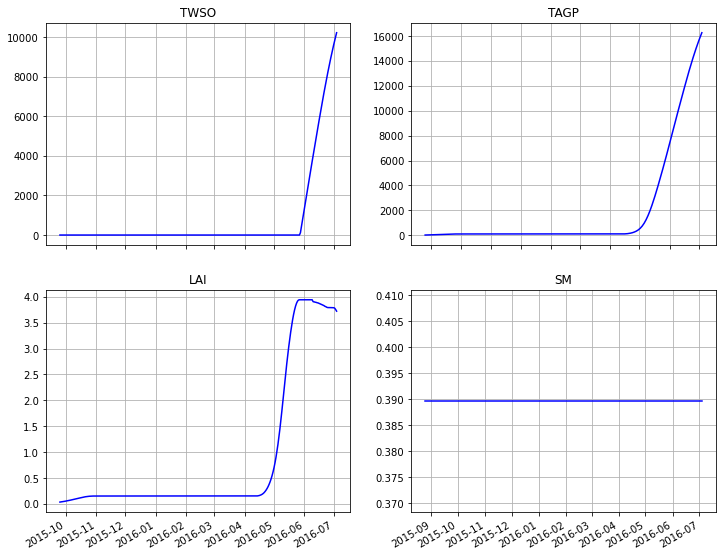

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["TWSO", "TAGP", "LAI", "SM"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
    ax.grid()
fig.autofmt_xdate()

In [66]:
crop_yield = np.round(df_results['TWSO'].values[-1], 2)
print(f"Crop yield - {cropd.current_crop_name}, Yield, kg/ha - {crop_yield}")

Crop yield - wheat, Yield, kg/ha - 10212.43


## End 🌾